In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
import chardet

# Detect the encoding
with open("data/PHP_21_3_24_T_60FR_100_W.csv", "rb") as file:
    result = chardet.detect(file.read())
    print(result)


{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [16]:
# loading raw data
# experiment 60FR 100W DI Water
# DATE: 21 3 2024

# loading thermal data
df_raw_60FR_100W_Therm = pd.read_csv("../data/PHP_21_3_24_T_60FR_100_W.csv", encoding='UTF_16',delimiter='\t')

# loading electrical data
df_raw_60FR_100W_Elect = pd.read_csv("../data/PHP_21_3_24_E_60FR_100_W.csv", encoding='UTF_16',delimiter='\t')

In [17]:
display(df_raw_60FR_100W_Therm)

,TIME,DATE,TC-1,TC-2,TC-3,TC-4,TC-5,TC-6,TC-7,TC-8,TC-9,PRESSURE,HEATER,HEATER SET POINT,Unnamed: 14
0,NaN,22/02/2024,36.5,36.2,35.5,35.3,34.7,29.3,29.0,29.0,26.5,-0.69,47,170,NaN
1,15:57:39,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.3,29.0,29.0,26.5,-0.69,47,170,NaN
2,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,NaN
3,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,NaN
4,15:57:45,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,NaN
13716,18:23:42,21/03/2024,95.6,95.2,94.9,96.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,NaN
13717,18:23:43,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,103.7,0.83,134,170,NaN
13718,18:23:45,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,102.4,0.72,134,170,NaN


In [18]:
display(df_raw_60FR_100W_Elect)

,TIME,DATE,voltage,current,power,Unnamed: 5
0,NaN,22/02/2024,82.1,1.216,100.2,NaN
1,15:57:38,22/02/2024,82.1,1.216,100.2,NaN
2,15:57:40,22/02/2024,82.1,1.216,100.0,NaN
3,15:57:42,22/02/2024,82.1,1.216,100.0,NaN
4,15:57:44,22/02/2024,82.1,1.216,99.9,NaN
...,...,...,...,...,...,...
13716,18:23:41,21/03/2024,84.1,1.235,104.0,NaN
13717,18:23:43,21/03/2024,84.1,1.234,104.0,NaN
13718,18:23:44,21/03/2024,84.1,1.235,104.0,NaN
13719,18:23:48,21/03/2024,84.0,1.234,103.8,NaN


In [21]:
df_raw_60FR_100W_Therm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13720 entries, 0 to 13719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME              13719 non-null  object 
 1   DATE              13720 non-null  object 
 2   TC-1              13720 non-null  float64
 3   TC-2              13720 non-null  float64
 4   TC-3              13720 non-null  float64
 5   TC-4              13720 non-null  float64
 6   TC-5              13720 non-null  float64
 7   TC-6              13720 non-null  float64
 8   TC-7              13720 non-null  float64
 9   TC-8              13720 non-null  float64
 10  TC-9              13720 non-null  float64
 11  PRESSURE          13720 non-null  float64
 12  HEATER            13720 non-null  int64  
 13  HEATER SET POINT  13720 non-null  int64  
 14  Unnamed: 14       0 non-null      float64
dtypes: float64(11), int64(2), object(2)
memory usage: 1.6+ MB


In [26]:
def process_datetime(df:pd.DataFrame, col:str='date')->pd.DataFrame:
    df[col] = df['DATE'] + df['TIME']
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y%H:%M:%S')
    return df

In [30]:
df_raw_60FR_100W_Elect = process_datetime(df_raw_60FR_100W_Elect)
df_raw_60FR_100W_Therm = process_datetime(df_raw_60FR_100W_Therm)

In [55]:
def join_thermal_electrical_data(df_thermal:pd.DataFrame, df_electrical:pd.DataFrame)->pd.DataFrame:
    df_join = pd.merge(left=df_thermal, right=df_electrical, on=['date', 'TIME', 'DATE'])
    df_join.dropna(axis=1, how='all', inplace=True)
    df_join.dropna(axis=0, how='any', inplace=True)
    df_join.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
    return df_join

In [56]:
df_raw_60FR_100W = join_thermal_electrical_data(df_thermal=df_raw_60FR_100W_Therm,
                                                df_electrical=df_raw_60FR_100W_Elect)

In [57]:
display(df_raw_60FR_100W)

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,PRESSURE,HEATER,HEATER SET POINT,date,voltage,current,power
1,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,2024-02-22 15:57:40,82.1,1.216,100.0
2,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:42,82.1,1.216,100.0
3,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:49,82.1,1.216,99.9
4,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:49,82.1,1.215,99.7
5,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,29.0,26.5,-0.68,49,170,2024-02-22 15:57:55,82.1,1.215,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,18:23:36,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:36,84.1,1.235,104.0
10650,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:41,84.1,1.235,104.0
10651,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:41,84.1,1.235,104.0
10652,18:23:43,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,103.7,0.83,134,170,2024-03-21 18:23:43,84.1,1.234,104.0


In [58]:
df_raw_60FR_100W.set_index('date')

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,PRESSURE,HEATER,HEATER SET POINT,voltage,current,power
date,,,,,,,,,,,,,,,,,
2024-02-22 15:57:40,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,82.1,1.216,100.0
2024-02-22 15:57:42,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.216,100.0
2024-02-22 15:57:49,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.216,99.9
2024-02-22 15:57:49,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.215,99.7
2024-02-22 15:57:55,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,29.0,26.5,-0.68,49,170,82.1,1.215,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 18:23:36,18:23:36,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0
2024-03-21 18:23:41,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0
2024-03-21 18:23:41,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0


<Axes: >

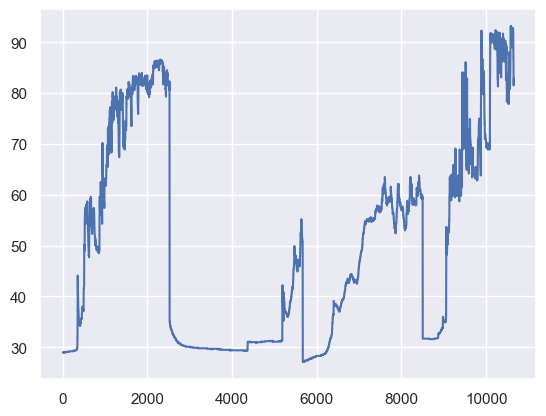

In [60]:
df_raw_60FR_100W.TC_8.plot()

<Axes: >

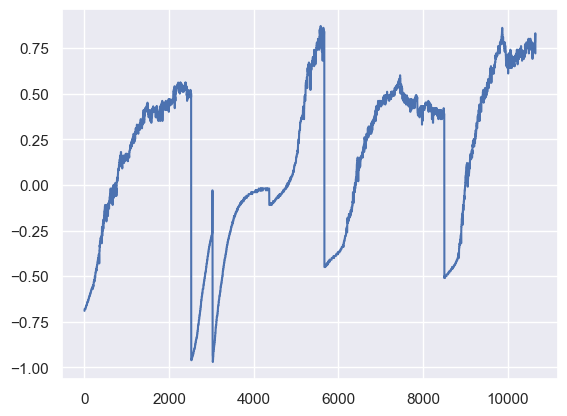

In [47]:
df_raw_60FR_100W.PRESSURE.plot()

<Axes: >

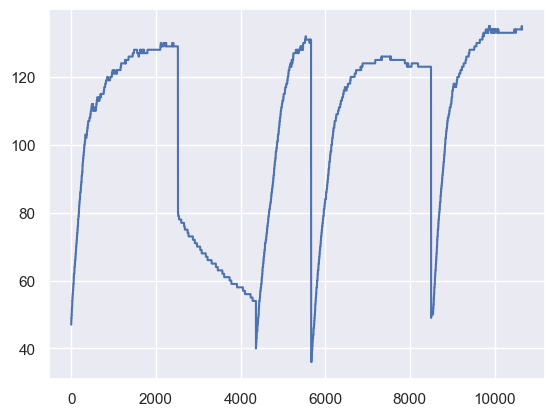

In [48]:
df_raw_60FR_100W.HEATER.plot()

<Axes: >

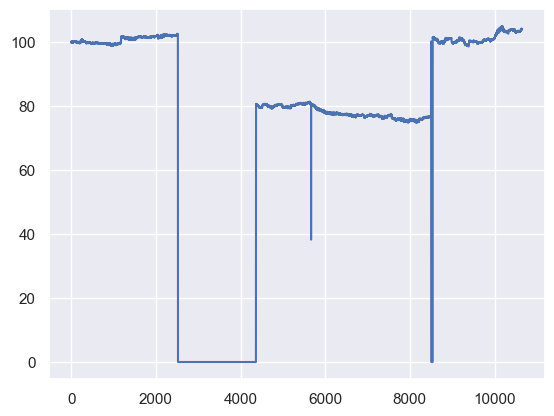

In [50]:
df_raw_60FR_100W.power.plot()